In [ ]:
import random
import pandas as pd
from pandas import DataFrame
import numpy as np

def game_mode(mode_num,citizen, mafia): #게임의 모드를 선택한다.
    mode=mode_num
    if(mode==1):
        party=entry(mode, citizen, mafia)
    elif(mode==2):
        party=entry(mode, citizen, mafia)
    elif(mode==3):
        party=entry(mode, citizen, mafia)
    elif(mode==4):
        party=entry(mode, citizen, mafia)
    else:
        print("잘못된 입력입니다.")
        mode=eval(input("모드를 입력하세요: "))
        party=entry(mode, citizen, mafia)
    return party
    
def entry(mode,citizen, mafia): #시민과 마피아의 딕셔너리를 리턴해주는 함수
    police=1
    medic=1
    if(mode==1):
        each_num={'시민':citizen, '마피아':mafia}
    elif(mode==2):
        each_num={'시민':citizen, '마피아':mafia, '경찰':police}
    elif(mode==3):
        each_num={'시민':citizen, '마피아':mafia, '의사':medic}
    elif(mode==4):
        each_num={'시민':citizen, '마피아':mafia, '경찰':police, '의사':medic}
    return each_num

def reset2_weight(member): #reset_weight 함수는 모드에 따라 참가자의 딕셔너리 value값을 리턴해줌
    c_wgt = member['시민']
    m_wgt = member['마피아']
    p_wgt = member['경찰']
    whole_wgt=c_wgt+m_wgt+p_wgt

    return c_wgt, m_wgt, p_wgt, whole_wgt

def reset3_weight(member):
    c_wgt = member['시민']
    m_wgt = member['마피아']
    d_wgt = member['의사']
    whole_wgt=c_wgt+m_wgt+d_wgt

    return c_wgt, m_wgt, d_wgt, whole_wgt

def reset4_weight(member):
    c_wgt = member['시민']
    m_wgt = member['마피아']
    p_wgt = member['경찰']
    d_wgt = member['의사']
    whole_wgt=c_wgt+p_wgt+m_wgt+d_wgt

    return c_wgt, m_wgt, p_wgt, d_wgt, whole_wgt

def mode1_game(member):
    mem=list(member.keys())
    today=0
    while(member['시민']>0 and member['마피아']>0 and member['시민']>member['마피아']):
        today+=1
        dead=random.choices(mem,weights=[member['시민'],member['마피아']],k=1)
        member[dead[0]]-=1
        if(member['시민']==member['마피아']): break
        member['시민']-=1
    if(member['시민']==member['마피아']):
            return True
    else: return False

def mode2_game(member):
    mem=list(member.keys())
    finding=['시민','마피아']
    just_people=['시민', '경찰']
    today=0
    while((member['시민']+member['경찰'])>0 and member['마피아']>0 and member['시민']>=0 and member['경찰']>=0):
        today+=1
        c,m,p,w = reset2_weight(member)
        if(today==1):
            dead=random.choices(mem, weights=[c, m, 0], k=1)
            member[dead[0]]-=1
        else:
            if(p!=0): #경찰이 살아 있으면 조사 결과에 따른 가중치 유무
                if(find[0]=='마피아'):
                    dead=random.choices(mem, weights=[c,c+1,1], k=1) 
                    member[dead[0]]-=1
                else:
                    dead=random.choices(mem, weights=[c,m,1], k=1)
                    member[dead[0]]-=1
            else:
                dead=random.choices(finding, weights=[1,1], k=1) #경찰이 죽었다면 투표시 시민 or 마피아만 무작위 죽음
                member[dead[0]]-=1
        if(member['시민'] + member['경찰']==0): break
        elif(member['마피아']==0): break
        c,m,p,w=reset2_weight(member)
        if(p!=0):
            if(c!=0):
                find=random.choices(finding, weights=[c,w-c-1], k=1) #경찰 조사(마피아와 시민의 수에 반비례하는 가중치 부여)
                c,m,p,w=reset2_weight(member)
                dead=random.choices(just_people, weights=[c,p], k=1) #마피아의 선택
        else:
            c,m,p,w=reset2_weight(member)
            dead=random.choices(just_people, weights=[c,0], k=1) #마피아의 선택
        member[dead[0]]-=1
    if(member['시민'] + member['경찰']==0): return True
    else: return False
        

def mode3_game(member):
    mem=list(member.keys())
    just_people=['시민','의사']
    today=0
    while((member['시민']+member['의사'])>0 and member['마피아']>0 and member['시민']>=0 and member['의사']>=0):
        today+=1
        if(today==1):
            c,m,d,w = reset3_weight(member)
            dead=random.choices(mem, weights=[c,m,d], k=1)
            member[dead[0]]-=1
        else:
            c,m,d,w=reset3_weight(member)
            if(d==0):    
                if(c!=0):
                    dead=random.choices(mem, weights=[m, c, d])
                    member[dead[0]]-=1
                else:
                    break
            else:
                c,m,d,w=reset3_weight(member)
                if(c!=0):
                    dead=random.choices(mem, weights=[c,m,d], k=1)
                    member[dead[0]]-=1
                else:
                    dead=random.choices(mem,weights=[c,m,d], k=1)
                    member[dead[0]]-=1
        if(member['시민']==0 and member['의사']==0): break
        elif(member['마피아']==0): break
        c,m,d,w=reset3_weight(member)
        if(d!=0):
            if(c!=0):
                dead=random.choices(just_people, weights=[c,d], k=1)
                save=random.choices(mem, weights=[0,0,1], k=1) 
                if(save[0]!=dead[0]):
                    member[dead[0]]-=1
                else:continue
            else:
                dead=random.choices(just_people, weights=[c,d], k=1)
                save=random.choices(mem, weights=[0,0,1], k=1) 
        elif(d==0):
            if(c!=0):
                dead=random.choices(just_people, weights=[c,d], k=1)
                member[dead[0]]-=1
            else:
                break
    if(member['시민']==0 and member['의사']==0): return True
    else: return False


def mode4_game(member):
    mem=list(member.keys())
    just_people=['시민', '경찰', '의사']
    finding=['시민', '마피아', '의사']
    today=0
    while((member['시민']+member['경찰'])+member['의사']>0 and member['마피아']>0 and member['시민']>=0 and member['경찰']>=0 and member['의사']>=0):
        today+=1
        if(today==1):
            c,p,m,d,w = reset4_weight(member)
            dead=random.choices(mem, weights=[c, m, 0, 0], k=1)
            member[dead[0]]-=1
        else:
            c,m,p,d,w=reset4_weight(member)
            if(p!=0):
                if(d!=0):
                    if(find[0]=='마피아'):
                        dead=random.choices(mem, weights=[c, c+2, 1, 1], k=1)
                        member[dead[0]]-=1
                    else:
                        dead=random.choices(mem, weights=[c, m, p, d], k=1)
                        member[dead[0]]-=1
                else:
                    if(find[0]=='마피아'):
                        if(c==0):
                            dead=random.choices(mem, weights=[c, c+2, p, d], k=1)
                            member[dead[0]]-=1
                        else:
                            dead=random.choices(mem, weights=[c, c+2, p, d], k=1)
                            member[dead[0]]-=1
                    else:
                        if(c==0):
                            dead=random.choices(mem, weights=[c, m, p, d], k=1)
                            member[dead[0]]-=1
                        else:
                            dead=random.choices(mem, weights=[c, m, p, d], k=1)
                            member[dead[0]]-=1
            else:
                if(d!=0):
                    dead=random.choices(mem, weights=[m, c, p, d], k=1)
                    member[dead[0]]-=1
                else:
                    dead=random.choices(mem, weights=[m, c, p, d], k=1)
                    member[dead[0]]-=1
        if(member['시민']==0 and member['경찰']==0 and member['의사']==0): break
        elif(member['마피아']==0): break
        c,m,p,d,w=reset4_weight(member)
        if(p!=0):
            if(d!=0):
                if(c!=0):
                    find=random.choices(finding, weights=[m,c,d], k=1) #경찰 조사(마피아와 시민의 수에 반비례하는 가중치 부여)
                    dead=random.choices(just_people, weights=[c,p,d], k=1) #마피아의 선택(가중치 의사,경찰<시민)
                    save=random.choices(mem, weights=[0,0,0,1], k=1) #의사 치료(가중치 마피아<의사,경찰<시민)
                    if(save[0]!=dead[0]):
                        member[dead[0]]-=1
                    else:continue
                else:
                    find=random.choices(finding, weights=[c,m,d], k=1) #경찰 조사(마피아와 시민의 수에 반비례하는 가중치 부여)
                    dead=random.choices(just_people, weights=[c,p,d], k=1)
                    save=random.choices(mem, weights=[0,0,0,1],k=1) #의사 치료(가중치 마피아<의사<시민)
                    if(save[0]!=dead[0]):
                        member[dead[0]]-=1
                    else:continue
            else:
                if(c!=0):
                    find=random.choices(finding, weights=[m,c,d], k=1) #경찰 조사(마피아와 시민의 수에 반비례하는 가중치 부여)
                    dead=random.choices(just_people, weights=[c,p,d], k=1)
                    member[dead[0]]-=1
                else:
                    find=random.choices(finding, weights=[c,m,d], k=1) #경찰 조사(마피아와 시민의 수에 반비례하는 가중치 부여)
                    dead=random.choices(just_people, weights=[c,p,d], k=1)
                    member[dead[0]]-=1
        else: #경찰 없다
            if(d!=0):
                if(c!=0):
                    dead=random.choice(['시민','의사'])
                    save=random.choices(mem, weights=[0,0,0,1], k=1)
                    if(save[0]!=dead):
                        member[dead]-=1
                    else: continue
            else:
                if(c!=0):
                    dead=random.choices(just_people, weights=[c,p,d], k=1)
                    member[dead[0]]-=1
    if(member['시민']==0 and member['경찰']==0 and member['의사']==0): return True
    else: return False
        

In [ ]:
def main(c_num, m_num,mode):
    k=0
    cnt=100
    #eval(input("시행횟수 입력: "))
    mafia_win=0
    while(k<cnt): #100번돌려서 마피아 승리 회수 카운트
        #print("============GAME START============")
        citizen=c_num
        #eval(input("시민 수 입력: "))
        mafia=m_num
        #eval(input("마피아 수 입력: "))
        #print("=================================")
        #print("게임 모드를 선택하세요")
        mode_num=mode
        member=game_mode(mode_num,citizen, mafia)
        if(mode1_game(member)==True):
            mafia_win+=1
        k+=1
    mafia_win/=cnt    
    return mafia_win

j=0
arr=[]
cnum=[]
while(j<100):    
    c_num=3+j #시민수 조작(증가)
    m_num=2  #마피아수 조작(유지 or 증가)
    mode=1 #game mode 선택 (1: 단순한 마피아 게임 2: 경찰이 추가 3: 의사 추가 4:경찰+의사 추가)
    cnum.append(c_num)
    arr.append(main(c_num, m_num, mode))
    j+=1
print("=====================================================================")
print(arr)
print(len(arr)) 
print("=====================================================================")
df = pd.DataFrame(arr)
df.to_csv('case1.csv',index=range(1,100), header=['simul'] )

[0.88, 0.91, 0.7, 0.84, 0.71, 0.82, 0.71, 0.71, 0.66, 0.73, 0.58, 0.75, 0.59, 0.6, 0.53, 0.51, 0.54, 0.72, 0.47, 0.57, 0.41, 0.57, 0.49, 0.62, 0.39, 0.53, 0.46, 0.5, 0.47, 0.52, 0.39, 0.5, 0.46, 0.34, 0.41, 0.51, 0.36, 0.51, 0.33, 0.44, 0.39, 0.44, 0.33, 0.4, 0.34, 0.42, 0.34, 0.32, 0.22, 0.37, 0.35, 0.32, 0.32, 0.38, 0.34, 0.37, 0.35, 0.36, 0.26, 0.37, 0.24, 0.28, 0.3, 0.35, 0.27, 0.38, 0.33, 0.37, 0.33, 0.38, 0.32, 0.34, 0.27, 0.38, 0.28, 0.36, 0.26, 0.38, 0.32, 0.32, 0.31, 0.26, 0.31, 0.22, 0.17, 0.35, 0.24, 0.36, 0.17, 0.29, 0.22, 0.2, 0.25, 0.3, 0.24, 0.39, 0.21, 0.39, 0.25, 0.31]
100


In [ ]:
from matplotlib import pyplot as plt

x=cnum
y=arr
plt.plot(x,y)
plt.xlabel('citizen num')
plt.ylabel('mafia win rate for citizen num')
plt.title('case1 sample')
plt.show()

<Figure size 640x480 with 1 Axes>

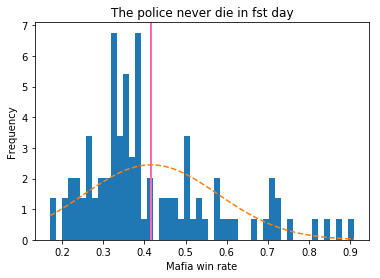

0.4163


In [ ]:
from matplotlib import pyplot as plt

mu = np.mean(arr)
sigma = np.std(arr)

nbins = 50
n, bins, patches = plt.hist(arr, bins = nbins, density = 1)
plt.xlabel("Mafia win rate")
plt.ylabel("Frequency")
plt.title("The police never die in fst day")
plt.axvline(x=np.mean(arr), linewidth=2, color='hotpink')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--')
plt.show()
print(np.mean(arr))

<h1>특수 능력에 따른 가중치는 실행 전에 직접 수정하며 실험을 하였음.</h1>

In [ ]:
def main2(c_num, m_num,mode):
    k=0
    cnt=100
    #eval(input("시행횟수 입력: "))
    mafia_win=0
    while(k<cnt): #100번돌려서 마피아 승리 회수 카운트
        #print("============GAME START============")
        #eval(input("시민 수 입력: "))
        #eval(input("마피아 수 입력: "))
        #print("=================================")
        #print("게임 모드를 선택하세요")
        member=game_mode(mode,c_num,m_num)
        if(mode2_game(member)==True):
            mafia_win+=1
        k+=1
    mafia_win/=cnt    
    return mafia_win

j=0
arr2=[]
while(j<100):    
    c_num=8 #시민수 조작(증가)
    m_num=2  #마피아수 조작(유지 or 증가)
    mode=2 #game mode 선택 (1: 단순한 마피아 게임 2: 경찰이 추가 3: 의사 추가 4:경찰+의사 추가)
    arr2.append(main2(c_num, m_num, mode))
    j+=1
print(arr2)
print(len(arr2))
df = pd.DataFrame(arr2)
df.to_csv('case2.csv',index=range(1,100), header=['simul'] )

[0.53, 0.44, 0.33, 0.47, 0.43, 0.38, 0.4, 0.43, 0.43, 0.46, 0.43, 0.37, 0.34, 0.35, 0.38, 0.41, 0.43, 0.4, 0.42, 0.41, 0.44, 0.4, 0.43, 0.55, 0.51, 0.52, 0.44, 0.44, 0.37, 0.41, 0.36, 0.39, 0.43, 0.42, 0.37, 0.42, 0.37, 0.33, 0.35, 0.47, 0.5, 0.45, 0.39, 0.4, 0.44, 0.48, 0.34, 0.33, 0.43, 0.37, 0.42, 0.4, 0.51, 0.41, 0.42, 0.42, 0.38, 0.4, 0.38, 0.36, 0.41, 0.42, 0.38, 0.43, 0.43, 0.41, 0.36, 0.37, 0.5, 0.41, 0.41, 0.44, 0.44, 0.37, 0.39, 0.4, 0.27, 0.38, 0.37, 0.44, 0.49, 0.35, 0.34, 0.48, 0.37, 0.38, 0.37, 0.42, 0.33, 0.45, 0.4, 0.41, 0.4, 0.44, 0.45, 0.49, 0.41, 0.43, 0.39, 0.43]
100


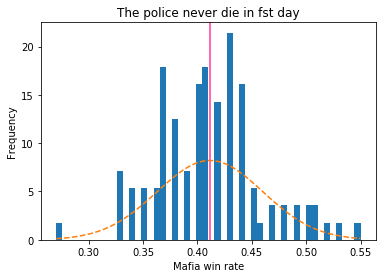

In [ ]:
from matplotlib import pyplot as plt

mu = np.mean(arr2)
sigma = np.std(arr2)

nbins = 50
n, bins, patches = plt.hist(arr2, bins = nbins, density = 1)
plt.xlabel("Mafia win rate")
plt.ylabel("Frequency")
plt.title("The police never die in fst day")
plt.axvline(x=np.mean(arr2), linewidth=2, color='hotpink')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--')
plt.show()

In [ ]:
def main3(c_num, m_num,mode):
    k=0
    cnt=100
    #eval(input("시행횟수 입력: "))
    mafia_win=0
    while(k<cnt): #100번돌려서 마피아 승리 회수 카운트
        #print("============GAME START============")
        #eval(input("시민 수 입력: "))
        #eval(input("마피아 수 입력: "))
        #print("=================================")
        #print("게임 모드를 선택하세요")
        member=game_mode(mode,c_num,m_num)
        if(mode3_game(member)==True):
            mafia_win+=1
        k+=1
    mafia_win/=cnt    
    return mafia_win

j=0
arr3=[]
while(j<100):    
    c_num=8 #시민수 조작(증가)
    m_num=2  #마피아수 조작(유지 or 증가)
    mode=3 #game mode 선택 (1: 단순한 마피아 게임 2: 경찰이 추가 3: 의사 추가 4:경찰+의사 추가)
    arr3.append(main3(c_num, m_num, mode))
    j+=1
print(arr3)
print(len(arr3))
df = pd.DataFrame(arr3)
df.to_csv('case3.csv',index=range(1,100), header=['simul'] )

[0.44, 0.33, 0.36, 0.32, 0.34, 0.36, 0.33, 0.3, 0.32, 0.3, 0.29, 0.32, 0.32, 0.43, 0.38, 0.39, 0.3, 0.27, 0.26, 0.33, 0.34, 0.33, 0.36, 0.47, 0.3, 0.36, 0.41, 0.36, 0.41, 0.32, 0.33, 0.36, 0.42, 0.36, 0.32, 0.36, 0.31, 0.34, 0.44, 0.35, 0.35, 0.37, 0.39, 0.39, 0.3, 0.29, 0.31, 0.38, 0.29, 0.34, 0.3, 0.3, 0.34, 0.33, 0.41, 0.39, 0.35, 0.42, 0.32, 0.32, 0.46, 0.31, 0.36, 0.39, 0.4, 0.42, 0.27, 0.33, 0.29, 0.35, 0.3, 0.26, 0.34, 0.27, 0.31, 0.37, 0.37, 0.37, 0.29, 0.34, 0.37, 0.41, 0.37, 0.33, 0.33, 0.29, 0.36, 0.33, 0.33, 0.34, 0.36, 0.36, 0.3, 0.23, 0.37, 0.34, 0.36, 0.37, 0.33, 0.36]
100


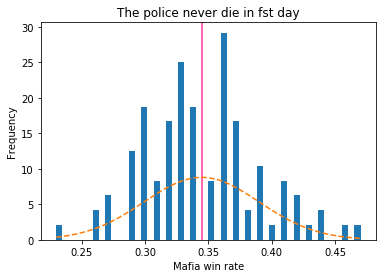

0.3446999999999999


In [ ]:
from matplotlib import pyplot as plt

mu = np.mean(arr3)
sigma = np.std(arr3)

nbins = 50
n, bins, patches = plt.hist(arr3, bins = nbins, density = 1)
plt.xlabel("Mafia win rate")
plt.ylabel("Frequency")
plt.title("The police never die in fst day")
plt.axvline(x=np.mean(arr3), linewidth=2, color='hotpink')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--')
plt.show()
print(np.mean(arr3))

In [ ]:
def main4(c_num, m_num,mode):
    k=0
    cnt=100
    #eval(input("시행횟수 입력: "))
    mafia_win=0
    while(k<cnt): #100번돌려서 마피아 승리 회수 카운트
        #print("============GAME START============")
        #eval(input("시민 수 입력: "))
        #eval(input("마피아 수 입력: "))
        #print("=================================")
        #print("게임 모드를 선택하세요")
        member=game_mode(mode,c_num,m_num)
        if(mode4_game(member)==True):
            mafia_win+=1
        k+=1
    mafia_win/=cnt    
    return mafia_win

j=0
arr4=[]
while(j<100):    
    c_num=3 #시민수 조작(증가)
    m_num=2  #마피아수 조작(유지 or 증가)
    mode=4 #game mode 선택 (1: 단순한 마피아 게임 2: 경찰이 추가 3: 의사 추가 4:경찰+의사 추가)
    arr4.append(main4(c_num, m_num, mode))
    j+=1
print(arr4)
print(len(arr4))
df = pd.DataFrame(arr4)
df.to_csv('case3.csv',index=range(1,100), header=['simul'] )

[0.37, 0.51, 0.51, 0.52, 0.35, 0.39, 0.45, 0.46, 0.44, 0.48, 0.45, 0.53, 0.4, 0.42, 0.4, 0.46, 0.53, 0.45, 0.44, 0.54, 0.47, 0.35, 0.48, 0.41, 0.55, 0.45, 0.35, 0.49, 0.46, 0.41, 0.5, 0.39, 0.37, 0.41, 0.42, 0.55, 0.52, 0.51, 0.45, 0.47, 0.42, 0.4, 0.42, 0.44, 0.42, 0.45, 0.46, 0.44, 0.43, 0.37, 0.42, 0.43, 0.39, 0.49, 0.53, 0.42, 0.43, 0.4, 0.39, 0.49, 0.45, 0.43, 0.41, 0.39, 0.44, 0.43, 0.55, 0.49, 0.42, 0.46, 0.41, 0.42, 0.45, 0.42, 0.43, 0.43, 0.51, 0.42, 0.47, 0.43, 0.51, 0.42, 0.45, 0.37, 0.42, 0.49, 0.38, 0.53, 0.38, 0.41, 0.44, 0.44, 0.5, 0.45, 0.43, 0.42, 0.4, 0.51, 0.42, 0.43]
100


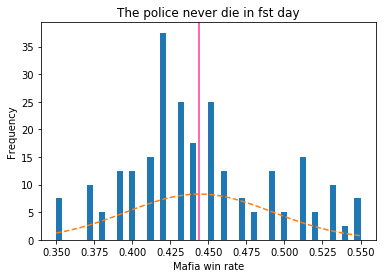

0.44410000000000005


In [ ]:
from matplotlib import pyplot as plt

mu = np.mean(arr4)
sigma = np.std(arr4)

nbins = 50
n, bins, patches = plt.hist(arr4, bins = nbins, density = 1)
plt.xlabel("Mafia win rate")
plt.ylabel("Frequency")
plt.title("The police never die in fst day")
plt.axvline(x=np.mean(arr4), linewidth=2, color='hotpink')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--')
plt.show()
print(np.mean(arr4))